In [36]:
import ast
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import community as community_louvain
from itertools import combinations

import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [17]:
content = pd.read_csv('flu_data_token.csv')

In [28]:
print(content)

        Year                                            Content
0  2018-2019  ['new', 'flu', 'season', 'thing', 'new', 'seas...


In [40]:
token: list = content['Content'][0]

In [41]:
token_list = ast.literal_eval(token)

In [42]:
print(token_list)

['new', 'flu', 'season', 'thing', 'new', 'season', 'flu', 'vaccine', 'update', 'well', 'match', 'circulate', 'virus', 'bvictoria', 'component', 'change', 'influenza', 'ah3n2', 'component', 'update', '20182019', 'season', 'nasal', 'spray', 'flu', 'vaccine', 'live', 'attenuate', 'influenza', 'vaccine', 'laiv', 'recommend', 'option', 'influenza', 'vaccination', 'person', 'otherwise', 'appropriate', 'nasal', 'spray', 'approve', 'use', 'nonpregnant', 'individual', '2', '49', 'year', 'old', 'precaution', 'use', 'laiv', 'people', 'certain', 'underlying', 'medical', 'condition', 'laiv', 'quadrivalent', 'fourcomponent', 'regulardose', 'eggbase', 'flu', 'shot', 'quadrivalent', 'recombinant', 'vaccine', 'quadrivalent', 'trivalent', 'recombinant', 'vaccine', 'available', 'season', 'cellgrown', 'flu', 'vaccine', 'quadrivalent', 'vaccine', 'influenza', 'ah3n2', 'influenza', 'b', 'reference', 'virus', 'cellderive', 'influenza', 'ah1n1', 'eggderive', 'reference', 'virus', 'grow', 'cell', 'produce', 'c

### Word count

In [52]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist


def word_count(cleaned_tokens):
  # Calculate word frequencies
  word_freq = FreqDist(cleaned_tokens)

  # Convert word frequencies to a DataFrame for seaborn
  data = {'Word': __builtins__.list(word_freq.keys()), 'Frequency': __builtins__.list(word_freq.values())}
  df_word_freq = pd.DataFrame(data)

  # Sort DataFrame by frequency in descending order
  df_word_freq = df_word_freq.sort_values(by='Frequency', ascending=False)
  print(df_word_freq.head(60))

  return df_word_freq

In [71]:
df_word_freq = word_count(token_list)

                Word  Frequency
1                flu        250
4            vaccine        124
9              virus         84
2             season         78
13         influenza         70
99               cdc         52
36            people         51
173              get         45
33              year         36
102         estimate         35
298            death         30
28               use         30
71              drug         29
143           united         29
144           states         29
85         antiviral         28
98       information         26
294          illness         25
212           health         24
23       vaccination         24
34               old         23
308     surveillance         23
48         available         22
114              may         21
8          circulate         20
60               age         20
146          protect         20
110           burden         19
198            child         19
140             also         18
21      

### Word Cloud

In [54]:
def token2word(token):
  word = ' '.join(token)
  return word

In [60]:
word = token2word(token_list)

In [58]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


def wordcloud_vis(word):
  # Generate word cloud
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(word)

  # Display the generated word cloud using matplotlib
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

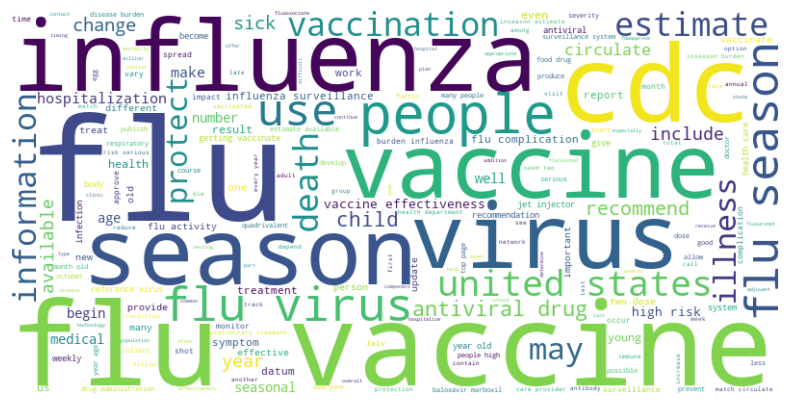

In [61]:
wordcloud_vis(word)

### Bar chart

In [64]:
def bar_chart_vis(token):

  word_freq = FreqDist(token)
  # Convert word frequencies to a DataFrame for seaborn
  data = {'Word': __builtins__.list(word_freq.keys()), 'Frequency': __builtins__.list(word_freq.values())}
  df_word_freq = pd.DataFrame(data)

  # Sort DataFrame by frequency in descending order
  df_word_freq = df_word_freq.sort_values(by='Frequency', ascending=False)

  # Plot a bar chart using seaborn
  plt.figure(figsize=(12, 6))
  sns.barplot(x='Word', y='Frequency', data=df_word_freq.head(20), palette='viridis')
  plt.title('Top 20 Most Frequent Words')
  plt.xlabel('Words')
  plt.ylabel('Frequency')
  plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
  plt.show()

/var/folders/n6/98dby4495lj_l5nmsm3lyr_40000gn/T/ipykernel_18034/768971708.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Frequency', data=df_word_freq.head(20), palette='viridis')


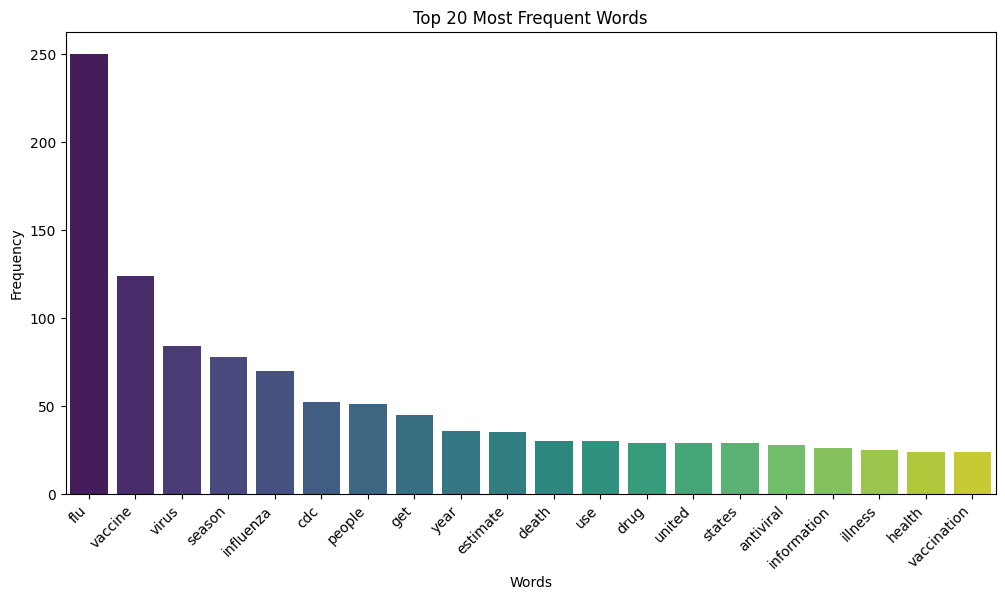

In [65]:
bar_chart_vis(token_list)

### Bubble chart

In [67]:
def bubble_chart_vis(cleaned_tokens):

  # Calculate word frequencies
  word_freq = FreqDist(cleaned_tokens)

  # Create a DataFrame with word frequencies and lengths
  data = {'Word': __builtins__.list(word_freq.keys()), 'Frequency': __builtins__.list(word_freq.values()), 'Length': [len(word) for word in word_freq.keys()]}
  df_word_data = pd.DataFrame(data)

  # Filter out words with frequency less than 2 for better visualization
  df_word_data = df_word_data[df_word_data['Frequency'] >= 2]

  # Plot a bubble chart using seaborn
  plt.figure(figsize=(12, 8))
  sns.scatterplot(x='Length', y='Frequency', size='Frequency', data=df_word_data, hue='Word', sizes=(50, 300), palette='viridis', alpha=0.8)
  plt.title('Bubble Chart of Word Frequencies and Lengths')
  plt.xlabel('Word Length')
  plt.ylabel('Frequency')
  plt.show()

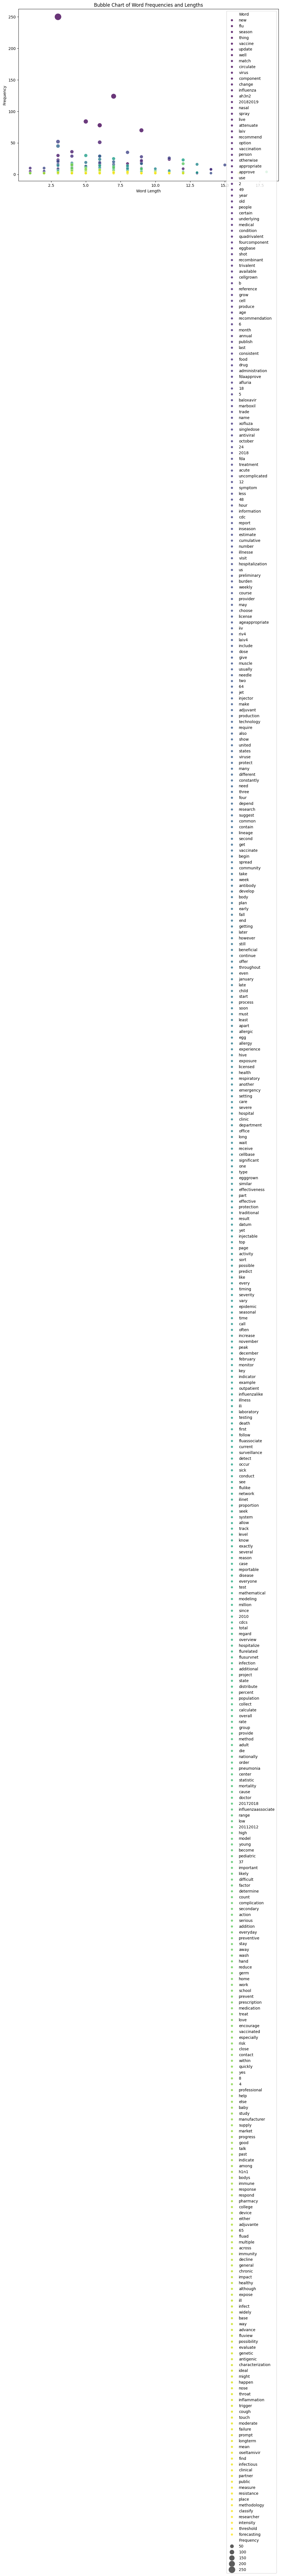

In [68]:
bubble_chart_vis(token_list)

### Network Diagram

In [76]:
def network_vis(df_word_freq):
    token_rank = df_word_freq.head(20)
    tr = token_rank['Word'].tolist()

    # Create a graph using networkx
    G = nx.Graph()

    # Create edges between co-occurring words
    for word1, word2 in combinations(tr, 2):
        if G.has_edge(word1, word2):
            G[word1][word2]['weight'] += 1
        else:
            G.add_edge(word1, word2, weight=1)

    # Detect communities (clusters) in the graph
    partition = community_louvain.best_partition(G)
    # Map each community to a distinct color
    community_colors = [partition[n] for n in G.nodes()]

    # Set node size based on degree (number of connections)
    node_size = [deg * 100 for deg in dict(G.degree()).values()]  # Adjusted size for better visibility

    # Draw the network diagram with community-based coloring
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G, seed=42)  # For consistent layout
    nx.draw(G, pos, with_labels=True, font_size=8, node_size=node_size,
            cmap=plt.cm.jet, node_color=community_colors, font_color='black',
            edge_color='gray', font_weight='bold', alpha=0.7)
    plt.title('Text Network Diagram based on Word Co-occurrence with Clustering')
    plt.show()

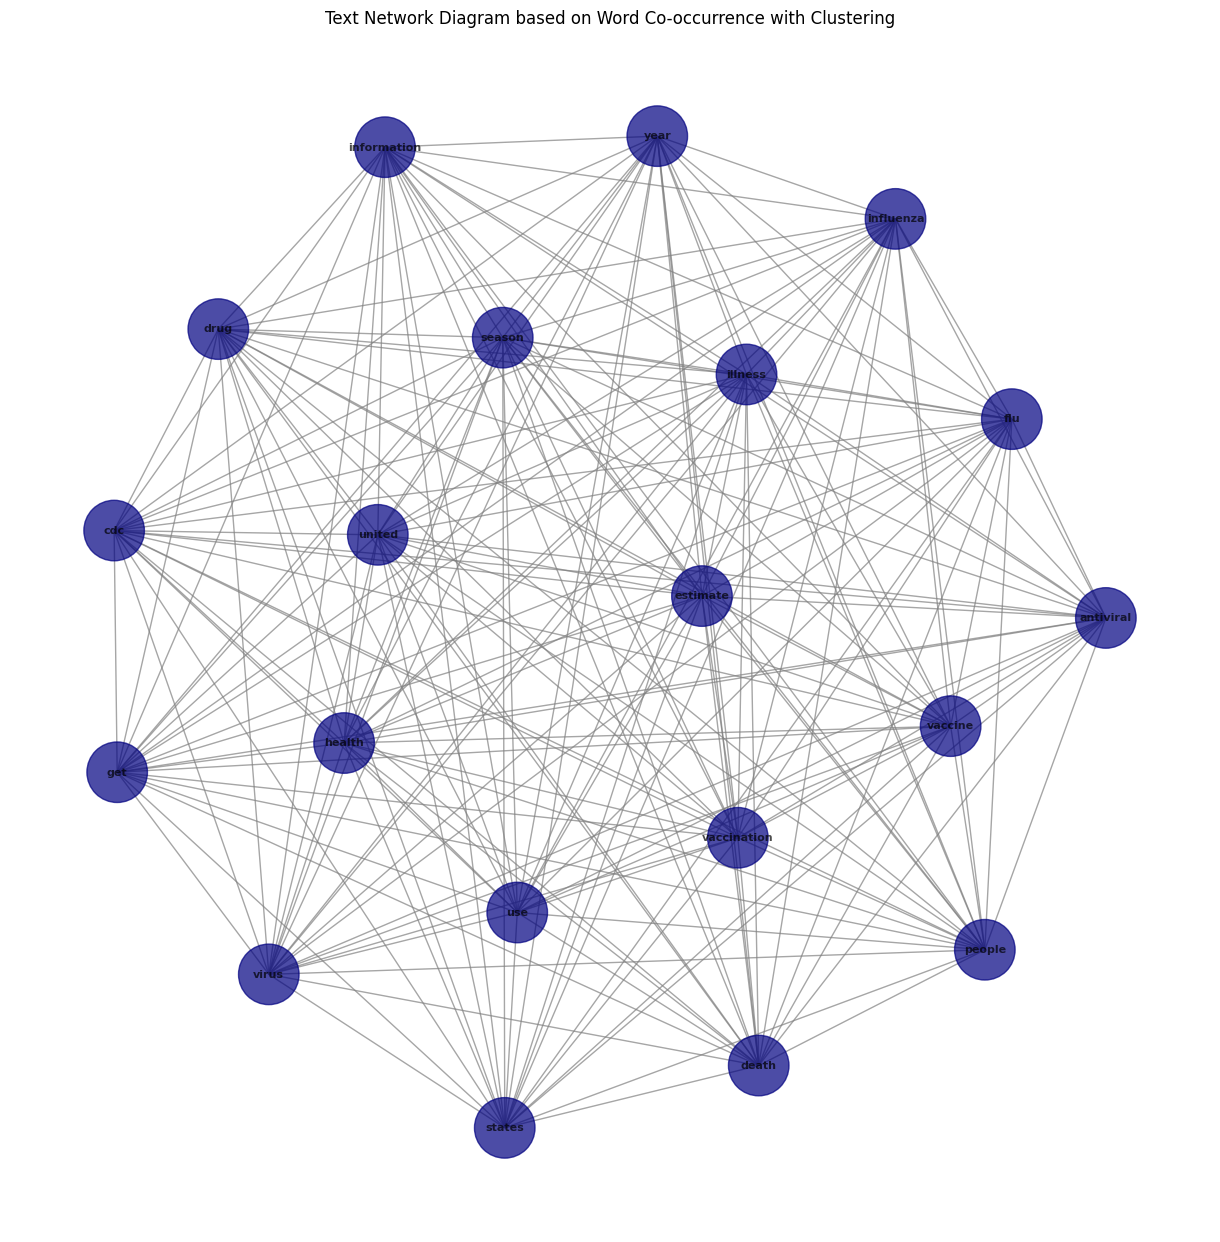

In [77]:
network_vis(df_word_freq)